<a href="https://colab.research.google.com/github/Jagannath8/GoeduHub-Training/blob/main/Assignment_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GO_STP_579 -> Jagannath Pal**

# ***Assignment_15***


---


Build a spam filter using Python and the multinomial Naive Bayes algorithm. 

Check Spam or Ham? Email Classifier Using Python using MultinomialNB.

Dataset click here.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Reading the Data

In [2]:
df = pd.read_csv('/content/spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Understanding the Data

In [3]:
df.dtypes

Category    object
Message     object
dtype: object

In [4]:
df.shape

(5572, 2)

In [5]:
df.size

11144

In [6]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
df.nunique()

Category       2
Message     5157
dtype: int64

In [15]:
df.isnull().any()

Category    False
Message     False
dtype: bool

# Visualization

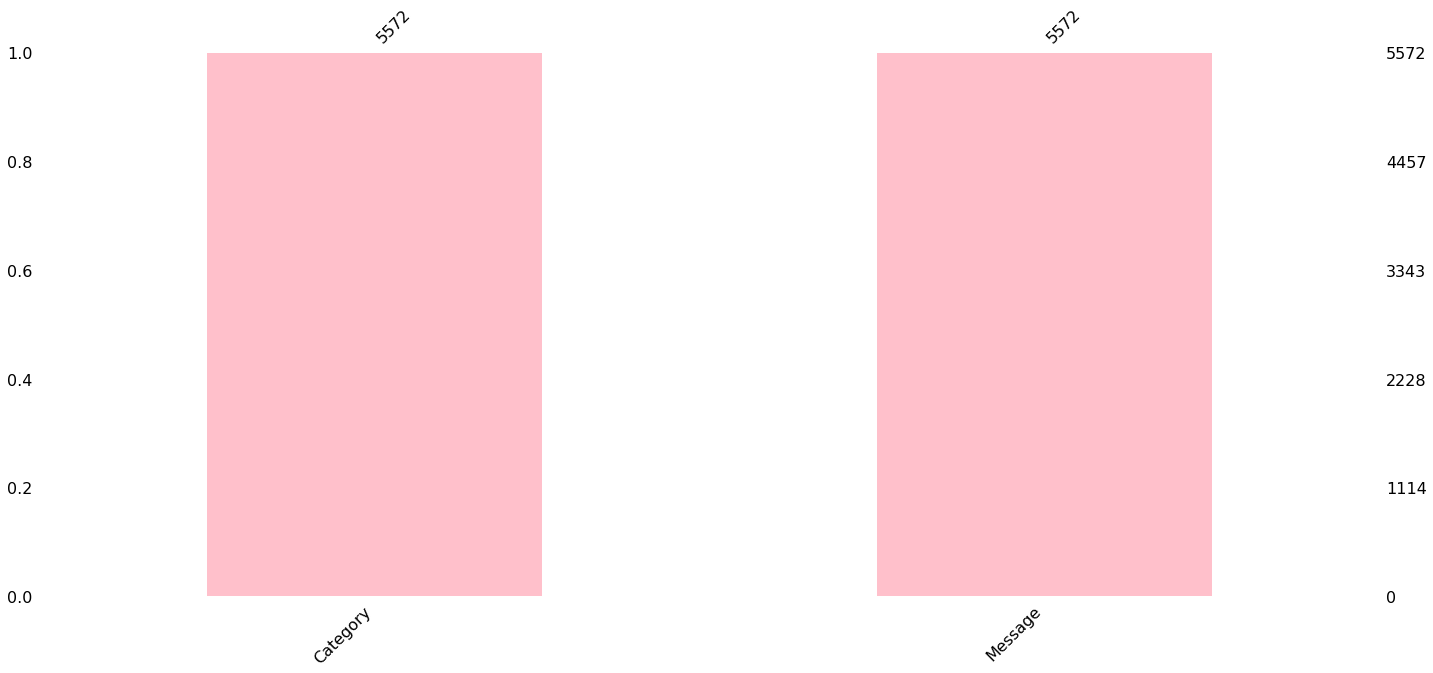

In [16]:
import missingno as no
no.bar(df, color='pink')

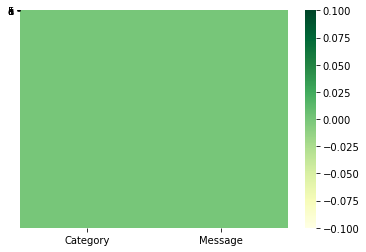

In [18]:
sns.heatmap(df.isnull(), yticklabels='False', cmap='YlGn')

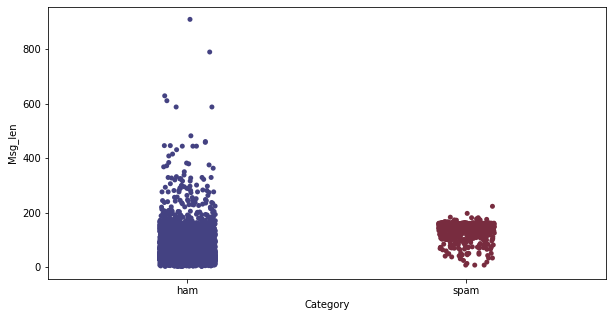

In [21]:
df["Msg_len"]=df["Message"].apply(len)

plt.figure(figsize=(10,5))
sns.stripplot(data=df, y='Msg_len',x='Category', palette='icefire')
plt.show()

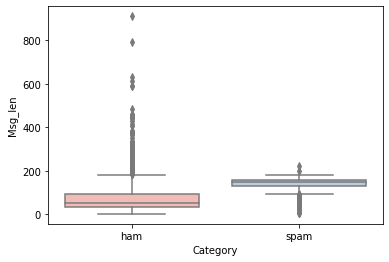

In [29]:
sns.boxplot(data=df, y='Msg_len', x='Category', palette='Pastel1')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


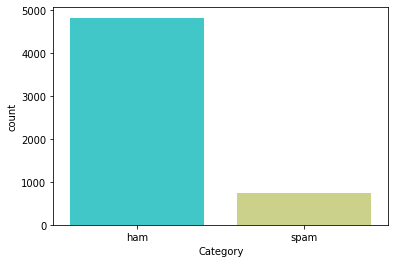

In [30]:
sns.countplot(df.Category, palette='rainbow')
plt.show()

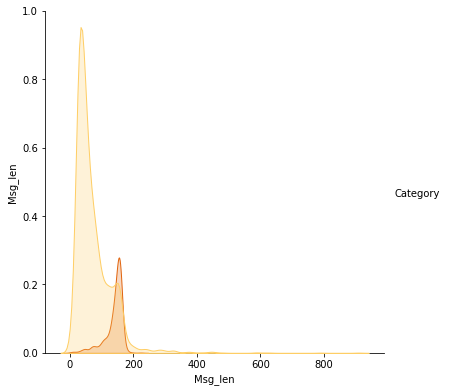

In [41]:
sns.set_palette("Paired")
sns.pairplot(df,hue='Category',height=5.5,palette='YlOrBr')
plt.show()

# **Multiomial Naive Bayes Classifier**

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer('english')

In [50]:
x = df['Message']
X = tfidf.fit_transform(x)
y = df['Category']

In [66]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

In [72]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=0.1)
mnb.fit(Xtrain, ytrain)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

# Prediction

In [73]:
ypred = mnb.predict(Xtest)
ypred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'spam'], dtype='<U4')

# Confusion Matrix

In [74]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
cm = confusion_matrix(ytest, ypred)
cm

array([[948,   9],
       [ 17, 141]])

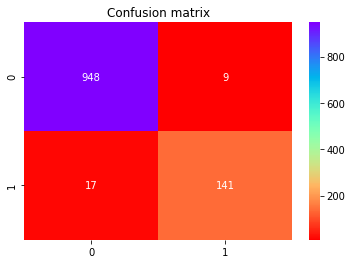

In [77]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="rainbow_r" ,fmt='g')
plt.title('Confusion matrix', y=5.1)
plt.show()

# Accuracy

In [76]:
ac = accuracy_score(ytest, ypred)
ac

0.9766816143497757



---

